In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('..')
import numpy as np
import networkqit as nq
import networkx as nx
import seaborn as sns
import numdifftools as nd
from numpy.random import random as rand
from networkqit import graph_laplacian as GL
from scipy.linalg import eigvalsh
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import pandas as pd
sns.set(font_scale=2)

In [3]:
def ER(n,p):
    T=np.triu(rand([n,n]),1)
    T=T+T.T
    A=(T<p).astype(float)
    np.fill_diagonal(A,0)
    return A

def LER(n,p):
    return GL(ER(n,p))

In [285]:
N=50
pstar=0.6
A=ER(N,pstar)
L=nq.graph_laplacian(A)
beta_range=np.logspace(0,-1,100)
M=nq.ErdosRenyi(N=len(A))
print(nx.density(nx.from_numpy_array(A)), A.sum()/2)

0.5959183673469388 730.0


In [298]:
num_samples = 1000
clip_gradients = None
max_iters = 1E3
eta = 1E-1
gtol = 1E-1
xtol = 1E-5

In [299]:
solver = nq.StochasticGradientDescent(A=A, x0=np.array([0.5,]),beta_range=beta_range)
solver.setup(expected_adj_fun=M, adj_sampling_fun=lambda x: ER(N,x), expected_laplacian_grad=M.expected_laplacian_grad)
sol = solver.run(num_samples=num_samples,clip_gradients=(-10,10),max_iters=max_iters, eta=eta, gtol=gtol)

beta= 0.12915496650148836 |grad|= 3.6264039635584706 x= 255.77042337095406  m= -313318.7686294188

KeyboardInterrupt: 

Text(0.5,1,'$\\Delta L$')

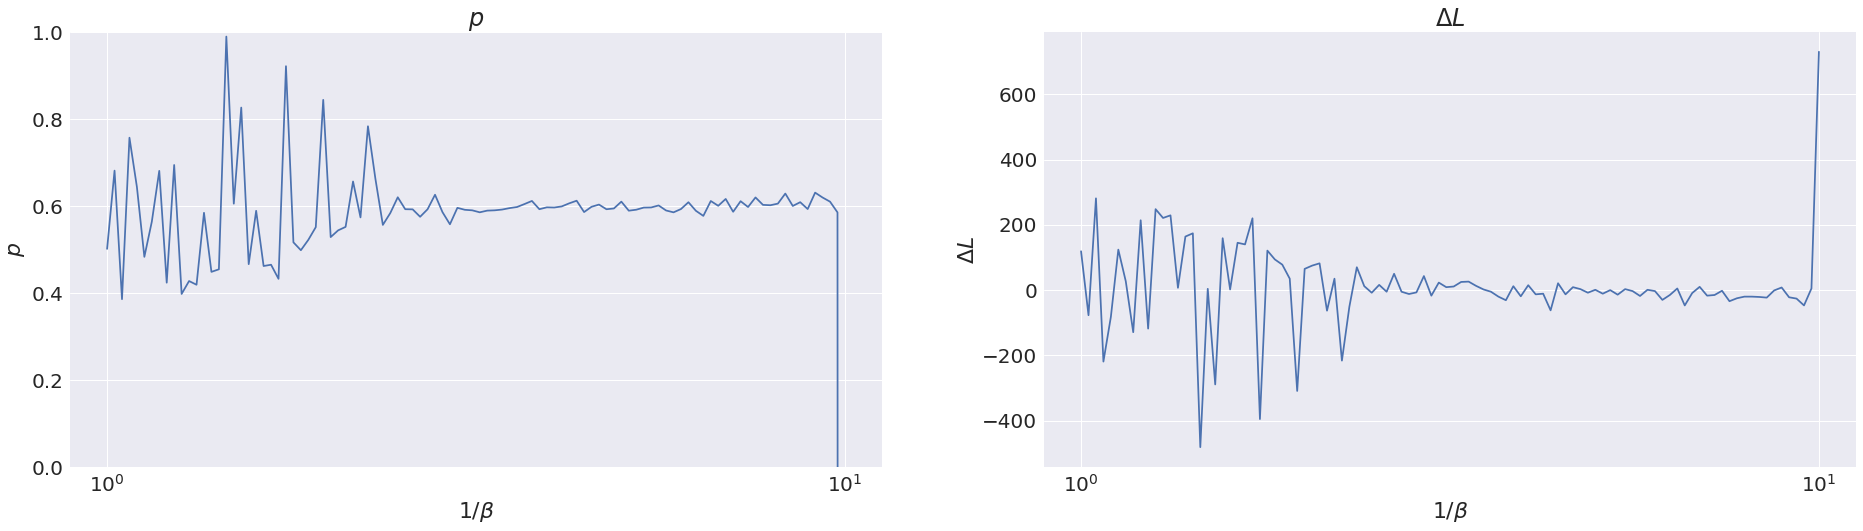

In [300]:
sns.set(font_scale=2)
df = pd.DataFrame(sol)
df['x'],df['beta']
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(32,8))
ax[0].semilogx(df['T'],[x[0] for x in df['x'].values])
ax[0].set_ylim([0,1])
ax[0].set_xlabel('$1/\\beta$')
ax[0].set_ylabel('$p$')
ax[0].set_title('$p$')

ax[1].semilogx(df['T'],df.DeltaL.values)
ax[1].set_xlabel('$1/\\beta$')
ax[1].set_ylabel('$\Delta L$')
ax[1].set_title('$\Delta L$')

In [252]:
N=100
pstar=0.2
A=ER(N,pstar)
k=A.sum(axis=0)
L=nq.graph_laplacian(A)
beta_range=np.logspace(-0.5,-0.8,1)
M=nq.UBCM(N=len(A))

num_samples = 50
clip_gradients = None
max_iters = 1E2
eta = 1E-2
gtol = 1E-3
xtol = 1E-4

def UBCMsample(x):
    P = np.outer(x,x)
    P /= (1+P)
    return (P<0.5).astype(float)

solver_ubcm = nq.StochasticGradientDescent(A=A, x0=np.random.random(len(A)),beta_range=beta_range)
solver_ubcm.setup(expected_adj_fun=M, adj_sampling_fun=UBCMsample, expected_laplacian_grad=M.expected_laplacian_grad)
sol_ubcm = solver_ubcm.run(num_samples=num_samples,clip_gradients=None,max_iters=max_iters, eta=eta, gtol=gtol)

iter= 11 beta= 0.31622776601683794 dl= -3850.0

In [268]:
for i in range(0,len(sol_ubcm[1])):
    print(M(pd.DataFrame(sol_ubcm[1]).iloc[i,:].values).sum()/2)

897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513
897.6360019262513


In [ ]:
df_ubcm = pd.DataFrame(sol_ubcm)

In [ ]:
solver = nq.Adam(A=A, x0=np.array([0.5,]),beta_range=beta_range)
solver.setup(expected_adj_fun=M, adj_sampling_fun=lambda x: ER(N,x), expected_laplacian_grad=M.expected_laplacian_grad)
sol = solver.run(num_samples=num_samples,clip_gradients=None,max_iters=max_iters, eta=eta, gtol=gtol)